# **Acquiring Static Data**

In this project, let's explore how to use Python to obtain static data for any purpose you need. All the files used in this project are in the same folder as this file.

## **Excel File**

Excel files are widely used in companies and can be an easy to create file when you need to import structured data.

In [25]:
import pandas as pd;

# Read an Excel file and show the first 5 rows
car_list = pd.read_excel("Car List.xlsx")
car_list.head()

<class 'pandas.core.frame.DataFrame'>


## **CSV File**

CSV files are also used because they are easy to interoperate and consume. Reading them in Python is also pretty straightforward:

In [20]:
# Read a CSV file and show the first 5 rows
countries = pd.read_csv("Countries.csv", sep=";")
countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


## **JSON File**

Another type of file that is very common is the JSON file. Here is how you can read specific values within it:

In [21]:
import json

# Read the JSON file
with open("UserConfig.json", "r") as json_file:
    user_config = json.load(json_file)

# Prints the values within the configuration
print(f"Username: {user_config['username']}")
print(f"Language: {user_config['language']}")
print(f"Fullscreen: {user_config['fullscreen']}")

Username: test123
Language: en-us
Fullscreen: False


## **Image File**

It is often necessary to read image files. They can be used as icons, logos, or for any other purpose. Check below how to do that:

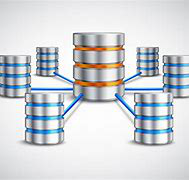

In [24]:
from PIL import Image
import IPython.display as display

# Read the image file
image_path = "Image.jpeg"
image = Image.open(image_path)

# Open the file in a separate window:
image.show()

# Show the image inline
display.display(image);

# Close the image file
image.close()

## **Web Pages**

In some cases, you might want to read information directly from a web page, instead of selecting it, creating a file, and then reading the file.
The code below shows one of the many ways in which you can accomplish that by reading the list of the busiest airports in 2022:

In [53]:
import requests
from lxml import html
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic"

# Send an HTTP request to fetch the page content
response = requests.get(url)

# Parse the HTML content using lxml
tree = html.fromstring(response.content)

# Find the table containing the busiest airports in 2022
table = tree.xpath("//table[contains(@class, 'wikitable') and contains(@class, 'sortable')][2]")[0]

# Extract the data from the table
airport_data = []
for row in table.xpath(".//tr")[1:]:
    rank, airport, passengers = row.xpath(".//td[position() = 1 or position() = 3 or position() = 6]")
    rank = int(rank.text_content().replace(".", ""))
    airport_name = airport.xpath(".//a")[0].text
    total_passengers = passengers.text_content().replace(",", "")
    airport_data.append({
        "Rank": rank,
        "Airport": airport_name,
        "Total Passengers": total_passengers
    })

# Create a pandas DataFrame
df_airports = pd.DataFrame(airport_data)

# Display the DataFrame
df_airports

,Rank,Airport,Total Passengers
0,1,Atlanta,93699630
1,2,Dallas,73362946
2,3,Denver,69286461
3,4,Chicago,68340619
4,5,Garhoud,66069981
5,6,Los Angeles,65924298
6,7,Arnavutköy,64289107
7,8,Hillingdon,61614508
8,9,Palam,59490074
9,10,Roissy-en-France,57474033


## **Database Tables**

When loading static data, you might need to import from an existing database. The code below shows how to do that by connecting to a MySql database.

In [60]:
import mysql.connector

# Database connection details for MySQL
host = "your_mysql_host"  # Replace with the actual MySQL host
database = "your_database_name"  # Replace with the actual database name
username = "your_username"  # Replace with your actual MySQL username
password = "your_password"  # Replace with your actual MySQL password

try:
    # Establish a connection
    conn = mysql.connector.connect(
        host=host,
        database=database,
        user=username,
        password=password
    )

    # Create a cursor
    cursor = conn.cursor()

    # Example query: Retrieve the product lines from the productlines table
    query = "SELECT productLine FROM productlines"

    # Execute the query
    cursor.execute(query)

    # Fetch the results
    results = cursor.fetchall()

    # Create a DataFrame from the results
    df_product_lines = pd.DataFrame(results)
    print(df_product_lines)

    # Close the cursor and connection
    cursor.close()
    conn.close()

except mysql.connector.Error as e:
    print(f"Error: {e}")

                  0
0      Classic Cars
1       Motorcycles
2            Planes
3             Ships
4            Trains
5  Trucks and Buses
6      Vintage Cars


## **API Response**

In some scenarios, an API will provide you the data you need. It is very easy to call an API and store the results in Python:

In [61]:
# API endpoint for the ReqRes API
url = "https://reqres.in/api/users"

try:
    # Make a GET request to the API
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Extract the list of users (assuming 'data' contains a list of user records)
        users = data.get("data", [])

        # Create a DataFrame from the user records
        df_users = pd.DataFrame(users)

        # Display the DataFrame
        print(df_users)
    else:
        print(f"Error: Request failed with status code {response.status_code}")

except requests.RequestException as e:
    print(f"Error: {e}")

   id                     email first_name last_name  \
0   1    george.bluth@reqres.in     George     Bluth   
1   2    janet.weaver@reqres.in      Janet    Weaver   
2   3       emma.wong@reqres.in       Emma      Wong   
3   4        eve.holt@reqres.in        Eve      Holt   
4   5  charles.morris@reqres.in    Charles    Morris   
5   6    tracey.ramos@reqres.in     Tracey     Ramos   

                                    avatar  
0  https://reqres.in/img/faces/1-image.jpg  
1  https://reqres.in/img/faces/2-image.jpg  
2  https://reqres.in/img/faces/3-image.jpg  
3  https://reqres.in/img/faces/4-image.jpg  
4  https://reqres.in/img/faces/5-image.jpg  
5  https://reqres.in/img/faces/6-image.jpg  
